In [21]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

import ipywidgets as widgets
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
df_polution = pd.read_csv('who_aap_2021_v9_11august2022.csv', delimiter=';')
df_life = pd.read_csv('163c5c0b-4ce0-4f4b-b4dc-8682e537b2e6.csv')
df_life.dropna(how='all', axis=1, inplace=True)
df_gdp = pd.read_csv('NHA.csv')









## Introduction:

The last couple years, air pollution has been more and more in de spotlights. The topic has many discussions going and concerns about the environment and public health has drastically increased. Research has shown that the quality of the air we breathe has a big impact on our health and well-being. The correlation between air quality, wealth, and life expectancy is very important to understand to see the potential effects of air pollution on different populations around the world. 

Our problem has arisen, because the society we live in is heavily dependent on products and activities that contribute to air pollution. The most harmful pollution consists of particulate matter, nitrogen dioxide, and ozone and it can cause serious health issues. Cardiovascular diseases, long cancer whole ecosystems getting destroyed are just some examples of the implications of air pollution.

To gain a better understanding of the relationship between air quality, wealth, and life expectancy, it is essential to examine data across countries. We have found some databases from the World Health Organization, who has been keeping track of different kinds of populational data. By comparing these variables, we can visualize and analyze how air pollution affects the health of populations in different parts of the world and how wealth influences the air pollution and health of populations. 

Through the power of data visualization, we can represent this data and information in such a way that a general audience will have a better understanding of the issue of air pollution and its impacts on the worldwide population. By organizing the data, we can get helpful insights in the links between air quality, wealth, and life expectancy and hopefully put some more pressure on the government to take action.

## Dataset and preprocessing
We used 3 different datasets. All from World Health Organization. 
1. WHO Ambient Air quality database

The WHO air quality database covers the measurements of air quality all over the world.
The measurements include the annual mean concentrations of nitrogen dioxide (NO2), particulate matter of a diameter equal or smaller than 10 μm (PM10) or equal or smaller than 2.5 μm (PM2.5). Those measurements have been chosen to give the best representation of the air quality, while both groups originate from human activity related to fossil fuel combustion. The points of measurement give a good average of the city or town.

2. WHO Global Health Expenditure Database

The WHO Global Health Expenditure Database covers the Gross Domestic Product (GDP) per capita for countries around the world. This database provides valuable insights into the economic well-being of a country, as it measures the average income generated per person within a county. By analysing the GDP per capita data, you can assess the standard of living and overall wealth distribution within a county. This information is crucial for understanding the economic context.

3. WHO Life expectancy at birth (years)

The WHO maintains a database that includes information on life expectancy at birth for various countries around the world. Life expectancy at birth reflects the average number of years a newborn is expected to life and is a key indicator of population health. This database gives valuable insights into the overall health and well-being of a population and can be used to monitor trends, compare different countries, and access the impact of various factors on the health of a population.

#### Preprocessing
General: 
The preprocessing of the first database was to change the ';' to a ','. 
The preprocessing of the second database was to clear out al the empty columns. 
The third database didn't have any general preprocessing. 

Specific:

Most of the preprocessing took place in the code of the graphs. Because for some graphs we needed other columns.
When using the databases for making graphs we first filtered out which columns we needed. 


## Perspective 1: The Urgent Need for Action

#### Disproportionate Exposure

Lower-income communities and developing nations often are in areas where there is a higher level of industrial activity, power plants and manufacturing facilities. In our visualization ‘Average PM10 by Region and Year’ you can see a clear difference between the wealthier part of the world, being Europe and America and the less wealthy part of the world being Eastern Mediterranean and Southeast Asia. These industries lead to more polluting emissions and higher levels of PM10 concentration.

In [22]:
pd.set_option('mode.chained_assignment', None)

df = df_polution[['WHO Region', 'Measurement Year', 'PM10 (μg/m3)', 'PM2.5 (μg/m3)', 'NO2 (μg/m3)']]

df['PM10 (μg/m3)'] = df['PM10 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert PM10 values to float
df['PM2.5 (μg/m3)'] = df['PM2.5 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert PM2.5 values to float
df['NO2 (μg/m3)'] = df['NO2 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert NO2 values to float

# Filter data to include years 2010 and onwards
df = df[(df['Measurement Year'] >= 2010) & (df['Measurement Year'] <= 2020)].copy()

# Group data by WHO Country Name and Measurement Year, and calculate average PM10 and PM2.5
df_avg = df.groupby(['WHO Region', 'Measurement Year'])[['PM10 (μg/m3)', 'PM2.5 (μg/m3)', 'NO2 (μg/m3)']].mean().reset_index()
# Define a function to update the plot based on the selected column
def update_plot(column):
    # Clear the current output
    clear_output(wait=False)
    
    # Create a new plot
    
    fig1 = px.bar(df_avg, x='Measurement Year', y=column, color='WHO Region',
             title=f'Average {column} by WHO Region and Year', barmode='group')

    display(column_dropdown)
    fig1.show()

# Create a dropdown widget to select the column
column_dropdown = widgets.Dropdown(options=['PM10 (μg/m3)', 'PM2.5 (μg/m3)', 'NO2 (μg/m3)'], description='air pollutants')

# Define a callback function for the dropdown widget
def dropdown_callback(change):
    column = change.new
    update_plot(column)

# Register the callback function with the dropdown widget
column_dropdown.observe(dropdown_callback, names='value')

# Initial plot with PM10 as the x-axis
update_plot('PM10 (μg/m3)')



Dropdown(description='air pollutants', options=('PM10 (μg/m3)', 'PM2.5 (μg/m3)', 'NO2 (μg/m3)'), value='PM10 (…

This visualization presents the average levels of three key air pollutants (PM10, PM2.5, and NO2) in micrograms per cubic meter (μg/m3) across various WHO regions from 2010 to 2020. The bar chart displays the average pollutant levels by region and year, with each bar representing a specific WHO region. The color-coded bars allow for easy comparison between regions and highlight any variations in air quality. By selecting different pollutants from the dropdown menu, readers can explore the impact of each pollutant and gain insights into the variations and trends in air pollution across different WHO regions over the specified period.

#### Limited Financial Resources

 Air pollution not only affects human health but also effects the wealth of a population and country. In our visualization ‘GDP against PM10’ you can see a clear pattern that a lot of high measurements of PM10 levels go hand in hand with countries with a low GDP per capita. Although most of the countries measured in the lower ends of PM10 levels, the ones that are high are also on the lower end of GDP per Capita axis. Lower-income communities and developing nations like Africa or Southeast Asia often face financial difficulties with transitioning to cleaner technologies or improving their infrastructure to a more sustainable version. A solution involves gathering resources to ensure that these difficulties will not exist anymore.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess the data for PM10
continent = df_polution[['WHO Region', 'WHO Country Name']]
continent = continent.dropna()
continent = continent.drop_duplicates()
df = df_polution[['WHO Country Name', 'Measurement Year', 'PM10 (μg/m3)']]
df.loc[:, 'PM10 (μg/m3)'] = df['PM10 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert PM10 values to float
# Filter data to include years 2010 and onwards
df = df[(df['Measurement Year'] >= 2010) & (df['Measurement Year'] <= 2020)].copy()
# Group data by WHO Country Name and Measurement Year, and calculate average PM10
df_avg = df.groupby(['WHO Country Name', 'Measurement Year'])['PM10 (μg/m3)'].mean().reset_index()
df_avg.to_csv('ipm10.csv')
# Select only 2019
#df_2019 = df_avg[df_avg['Measurement Year'] == 2019].copy()

# Preprocess the data for gdp
# Specifically go for the column of GDP of year 2010 to 2020 sorted by countries.
years = [str(year) for year in range(2010, 2020)]  # Generate a list of years from 2010 to 2019
gdp_per_capita_2010_to_2019 = df_gdp.loc[df_gdp['Indicators'] == 'Gross Domestic Product (GDP) per Capita in US$', ['Countries'] + years]
gdp_per_capita_2010_to_2019 = gdp_per_capita_2010_to_2019.rename(columns={'Countries':'WHO Country Name'})


# Transpose the gdp_per_capita_2010_to_2019 DataFrame
gdp_per_capita_transposed = gdp_per_capita_2010_to_2019.melt(id_vars=["WHO Country Name"], var_name="Measurement Year", value_name="Value")
gdp_per_capita_transposed["Measurement Year"] = gdp_per_capita_transposed["Measurement Year"].astype(int)

# Merge the DataFrames on the "WHO Country Name" and "Measurement Year" columns
merged_df = df_avg.merge(gdp_per_capita_transposed, on=["WHO Country Name", "Measurement Year"])

# Clean data
cleaned_merged_df = merged_df.dropna()
cleaned_merged_df = cleaned_merged_df.drop_duplicates()
cleaned_merged_df = cleaned_merged_df.rename(columns={'Value':'GDP'})
cleaned_merged_df['GDP'] = cleaned_merged_df['GDP'].str.replace(',', '')
cleaned_merged_df['GDP'] = cleaned_merged_df['GDP'].astype(float)
cleaned_merged_df = cleaned_merged_df.merge(continent, on='WHO Country Name')
cleaned_merged_df = cleaned_merged_df.sort_values(by='WHO Region')
cleaned_merged_dfGDP = cleaned_merged_df


year_slider = widgets.IntSlider(
    value=2019,
    min=2010,
    max=2019,
    step=1,
    description='Year:',
    continuous_update=False
)

# Create the figure and axes outside the update_plot function

def update_plot(year):
    #ax.clear()  # Clear the previous plot
    selected_df = cleaned_merged_dfGDP[cleaned_merged_df['Measurement Year'] == year].copy()
    sns.scatterplot(data=selected_df, y='GDP', x='PM10 (μg/m3)', hue='WHO Region')
    plt.title(f'GDP against PM10 in {year}')
    plt.show()

widgets.interact(update_plot, year=year_slider)


interactive(children=(IntSlider(value=2019, continuous_update=False, description='Year:', max=2019, min=2010),…

<function __main__.update_plot(year)>

The scatter plot titled "GDP against PM10" visualizes the relationship between Gross Domestic Product (GDP) per capita and PM10 levels (particulate matter with diameter less than 10μm) in ambient air for the selected year. The plot includes a slider that allows you to change the year. Each data point represents a country, color-coded by WHO Region. The y-axis represents GDP per capita, while the x-axis represents PM10 levels. By exploring different years, you can analyze the variations in GDP and air pollution levels and observe any potential patterns or trends. This visualization helps to understand the potential association between economic development (GDP) and environmental quality (PM10 pollution).

#### Health Impacts

High levels of air pollution contribute to various health problems, including respiratory issues, cardiovascular diseases, and even premature death. 
In our visualization ‘Life expectancy against PM10’ there is a clear pattern of dots in the 0-50 ug/m3 area who are on the higher end of the life expectancy axis. We saw that there is a correlation between GDPs per capita and PM10 levels. Lower-income residents already face various socioeconomic challenges, such as quality healthcare and nutritious food. Exposure to high levels of PM10 can intensify these disparities and can increase healthcare risks. The visualization provides a clear correlation between lower PM10 levels and higher life expectancy and support the argument that air pollution has a bad influence on populational health. 

## Perspective 2

#### Impact on Industries and Employment

Strict regulations targeting air pollution can have a significant impact on businesses, particularly those that heavily rely on polluting activities or industries.
Excessive regulatory measures may result in increased compliance costs, reduced competitiveness, and potential job losses in affected sectors.
A balanced approach to air pollution considers the potential trade-offs and unintended consequences of strict regulations to ensure the sustainability of businesses and employment opportunities.

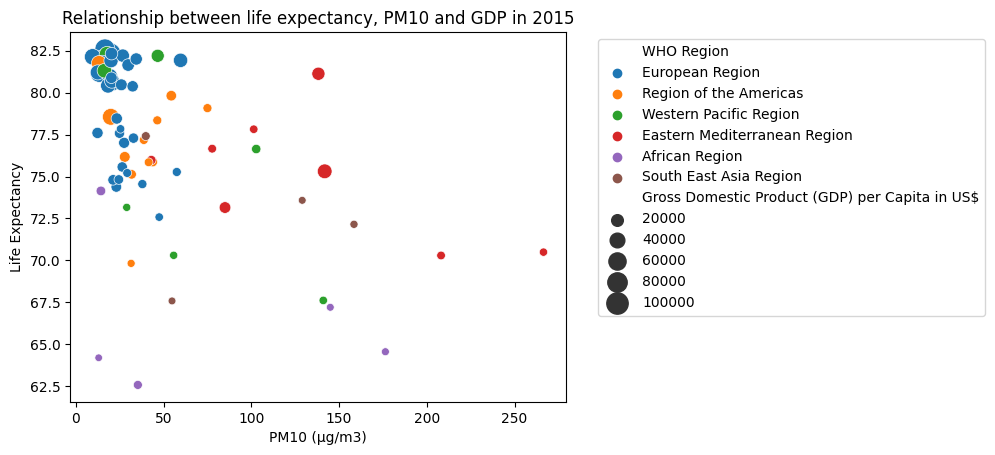

In [24]:
import numpy as np
# Preprocess the data for gdp
# Specifically go for the column of GDP of year 2019 sorted by countries.
gdp2 = df_gdp.pivot(index='Countries', columns='Indicators', values='2015')
gdp_per_capita_2019 = gdp2['Gross Domestic Product (GDP) per Capita in US$']


# Preprocess the data for PM10
continent = df_polution[['WHO Region', 'WHO Country Name']]
df = df_polution[['WHO Country Name', 'Measurement Year', 'PM10 (μg/m3)']]
df.loc[:, 'PM10 (μg/m3)'] = df['PM10 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert PM10 values to float
# Filter data to include years 2010 and onwards
df = df[(df['Measurement Year'] >= 2010) & (df['Measurement Year'] <= 2020)].copy()
# Group data by WHO Country Name and Measurement Year, and calculate average PM10
df_avg = df.groupby(['WHO Country Name', 'Measurement Year'])['PM10 (μg/m3)'].mean().reset_index()
# Select only 2015
df_2019 = df_avg[df_avg['Measurement Year'] == 2015].copy()


# Preprocess the data for life expectancy
# Indicator for life expectancy at birth/60, Dim1 is sex, Value is life expect.
life = df_life[['Location', 'Indicator', 'Period', 'Dim1', 'Value']]
#filter out to 2019, life expect at birth, and both sexes
life_filtered = life[life['Period'] == 2015].copy()
life_filtered = life_filtered[life_filtered['Indicator'] == 'Life expectancy at birth (years)'].copy()
life_filtered = life_filtered[life_filtered['Dim1'] == 'Both sexes'].copy()
life_filtered = life_filtered[['Location', 'Value']]


#Merge the two, followed by adding the WHO region defined by continent.
merge_df = df_2019.merge(life_filtered, left_on='WHO Country Name', right_on='Location')
merged_df = merge_df.merge(gdp_per_capita_2019, left_on='WHO Country Name', right_on='Countries')
merged_df = merged_df.merge(continent, on='WHO Country Name')
#clean the data by dropping duplicates and removing null values
cleaned_merged_df = merged_df.dropna()
cleaned_merged_df = cleaned_merged_df.drop_duplicates()


cleaned_merged_df['Life Expectancy'] = cleaned_merged_df['Value']
cleaned_merged_df['Gross Domestic Product (GDP) per Capita in US$'] = cleaned_merged_df['Gross Domestic Product (GDP) per Capita in US$'].str.replace(',', '')
cleaned_merged_df['Gross Domestic Product (GDP) per Capita in US$'] = cleaned_merged_df['Gross Domestic Product (GDP) per Capita in US$'].astype(float)
cleaned_merged_df = cleaned_merged_df.sort_values(by='Gross Domestic Product (GDP) per Capita in US$', ascending=False)


ax = sns.scatterplot(data=cleaned_merged_df,
            y='Life Expectancy',
            x='PM10 (μg/m3)',
            hue='WHO Region',    
            size='Gross Domestic Product (GDP) per Capita in US$',
            sizes=(30, 250),
            legend='brief')


ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax.set_title("Relationship between life expectancy, PM10 and GDP in 2015")

# Display the plot
plt.show()

This scatter plot showcases the relationship between life expectancy at birth, average PM10 (particulate matter with a diameter of 10 micrometers or less) levels, and Gross Domestic Product (GDP) per capita for different countries in the year 2015. The y-axis represents life expectancy in years, the x-axis represents average PM10 concentration in micrograms per cubic meter (μg/m3), and the size of the data points reflects the GDP per capita. Each data point corresponds to a country and is color-coded based on the WHO region. The chart allows readers to explore the potential connection between life expectancy, PM10 pollution, and economic prosperity, providing insights into the complex relationship between health, environment, and GDP.

In [25]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(
    y=cleaned_merged_df['Life Expectancy'],
    x=cleaned_merged_df['Gross Domestic Product (GDP) per Capita in US$'],
    mode='lines',
    name='Line Graph'
))

# Set the title and axis labels
fig.update_layout(
    title='Life Expectancy vs GDP',
    yaxis_title='Life Expectancy',
    xaxis_title='Gross Domestic Product (GDP) per Capita in US$'
)

# Display the plot
fig.show()

This line graph visualizes the relationship between life expectancy and Gross Domestic Product (GDP) per capita in US dollars. Each data point represents a country, and the line represents the trend between these two variables.

The y-axis represents life expectancy, indicating the average number of years a person can expect to live. The x-axis represents GDP per capita, reflecting the economic prosperity of each country.

The graph aims to investigate the potential correlation between life expectancy and economic development. A positive trend in the line suggests that higher GDP per capita is associated with increased life expectancy. This visualization provides insights into the interplay between socioeconomic factors and life expectancy, highlighting the importance of economic well-being in determining population health outcomes.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess the data for PM10 and PM2.5
continent = df_polution[['WHO Region', 'WHO Country Name']]
df = df_polution[['WHO Country Name', 'Measurement Year', 'PM10 (μg/m3)', 'PM2.5 (μg/m3)', 'NO2 (μg/m3)']]

df.loc[:, 'PM10 (μg/m3)'] = df['PM10 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert PM10 values to float
df.loc[:, 'PM2.5 (μg/m3)'] = df['PM2.5 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert PM2.5 values to float
df.loc[:, 'NO2 (μg/m3)'] = df['NO2 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert NO2 values to float

# Filter data to include years 2010 and onwards
df = df[(df['Measurement Year'] >= 2010) & (df['Measurement Year'] <= 2020)].copy()

# Group data by WHO Country Name and Measurement Year, and calculate average PM10 and PM2.5
df_avg = df.groupby(['WHO Country Name', 'Measurement Year'])[['PM10 (μg/m3)', 'PM2.5 (μg/m3)', 'NO2 (μg/m3)']].mean().reset_index()

# Select only 2019
df_2019 = df_avg[df_avg['Measurement Year'] == 2019].copy()



# Preprocess the data current health expenditure
# Indicator for life expectancy at birth/60, Dim1 is sex, Value is life expect.
life = df_life[['Location', 'Indicator', 'Period', 'Dim1', 'Value']]
#filter out to 2019, life expect at birth, and both sexes
years = [str(year) for year in range(2010, 2020)]  # Generate a list of years from 2010 to 2019
gdp_per_capita_2010_to_2019 = df_gdp.loc[df_gdp['Indicators'] == 'Current Health Expenditure (CHE)', ['Countries'] + years]
gdp_per_capita_2010_to_2019 = gdp_per_capita_2010_to_2019.rename(columns={'Countries':'WHO Country Name'})

# Transpose the gdp_per_capita_2010_to_2019 DataFrame
gdp_per_capita_transposed = gdp_per_capita_2010_to_2019.melt(id_vars=["WHO Country Name"], var_name="Measurement Year", value_name="Value")
gdp_per_capita_transposed["Measurement Year"] = gdp_per_capita_transposed["Measurement Year"].astype(int)

# Merge the DataFrames on the "WHO Country Name" and "Measurement Year" columns
merged_df = df_avg.merge(gdp_per_capita_transposed, on=["WHO Country Name", "Measurement Year"])

# Clean data
cleaned_merged_df = merged_df.dropna()
cleaned_merged_df = cleaned_merged_df.drop_duplicates()
cleaned_merged_df = cleaned_merged_df.rename(columns={'Value':'CHE'})
cleaned_merged_df['CHE'] = cleaned_merged_df['CHE'].str.replace(',', '')
cleaned_merged_df['CHE'] = cleaned_merged_df['CHE'].astype(float)
cleaned_merged_df = cleaned_merged_df.merge(continent, on='WHO Country Name')
cleaned_merged_df = cleaned_merged_df.sort_values(by='WHO Region')
cleaned_merged_dfCHE = cleaned_merged_df

year_slider = widgets.IntSlider(
    value=2019,
    min=2010,
    max=2019,
    step=1,
    description='Year:',
    continuous_update=False
)

# Create the figure and axes outside the update_plot function

def update_plot(year):
    ax.clear()  # Clear the previous plot
    selected_df = cleaned_merged_dfCHE[cleaned_merged_df['Measurement Year'] == year].copy()
    sns.scatterplot(data=selected_df, y='CHE', x='PM10 (μg/m3)', hue='WHO Region')
    plt.title(f'Current health expenditure in million US$ against PM10 in {year}')
    plt.show()

widgets.interact(update_plot, year=year_slider)


interactive(children=(IntSlider(value=2019, continuous_update=False, description='Year:', max=2019, min=2010),…

<function __main__.update_plot(year)>

The scatter plot titled "Current health expenditure in million US$ against PM10" visualizes the relationship between current health expenditure (CHE) and PM10 levels (particulate matter with diameter less than 10μm) in ambient air for the selected year. The plot includes a slider that allows you to change the year. Each data point represents a country, color-coded by WHO Region. The y-axis represents current health expenditure, while the x-axis represents PM10 levels. By exploring different years, you can analyze the variations in health expenditure and air pollution levels and observe any potential patterns or trends.

Dropdown(description='air pollutants', options=('PM10 (μg/m3)', 'PM2.5 (μg/m3)', 'NO2 (μg/m3)'), value='PM10 (…

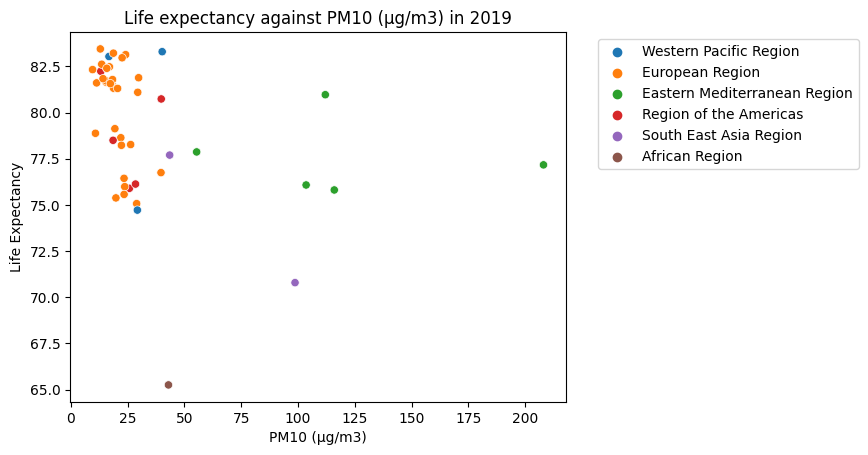

In [27]:


# Preprocess the data for PM10 and PM2.5
continent = df_polution[['WHO Region', 'WHO Country Name']]
df = df_polution[['WHO Country Name', 'Measurement Year', 'PM10 (μg/m3)', 'PM2.5 (μg/m3)', 'NO2 (μg/m3)']]

df.loc[:, 'PM10 (μg/m3)'] = df['PM10 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert PM10 values to float
df.loc[:, 'PM2.5 (μg/m3)'] = df['PM2.5 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert PM2.5 values to float
df.loc[:, 'NO2 (μg/m3)'] = df['NO2 (μg/m3)'].str.replace(',', '.', regex=False).astype(float)  # Convert NO2 values to float

# Filter data to include years 2010 and onwards
df = df[(df['Measurement Year'] >= 2010) & (df['Measurement Year'] <= 2020)].copy()

# Group data by WHO Country Name and Measurement Year, and calculate average PM10 and PM2.5
df_avg = df.groupby(['WHO Country Name', 'Measurement Year'])[['PM10 (μg/m3)', 'PM2.5 (μg/m3)', 'NO2 (μg/m3)']].mean().reset_index()

# Select only 2019
df_2019 = df_avg[df_avg['Measurement Year'] == 2019].copy()




# Preprocess the data for life expectancy
# Indicator for life expectancy at birth/60, Dim1 is sex, Value is life expect.
life = df_life[['Location', 'Indicator', 'Period', 'Dim1', 'Value']]
#filter out to 2019, life expect at birth, and both sexes
life_filtered = life[life['Period'] == 2019].copy()
life_filtered = life_filtered[life_filtered['Indicator'] == 'Life expectancy at birth (years)'].copy()
life_filtered = life_filtered[life_filtered['Dim1'] == 'Both sexes'].copy()
life_filtered = life_filtered[['Location', 'Value']]


#Merge the two, followed by adding the WHO region defined by continent.
merge_df = df_2019.merge(life_filtered, left_on='WHO Country Name', right_on='Location')
merged_df = merge_df.merge(continent, on='WHO Country Name')
#clean the data by dropping duplicates and removing null values
cleaned_merged_df = merged_df.dropna()
cleaned_merged_df = cleaned_merged_df.drop_duplicates()


#Change column name for in graph
cleaned_merged_df['Life Expectancy'] = cleaned_merged_df['Value']





# Define a function to update the plot based on the selected column
def update_plot(column):
    # Clear the current output
    clear_output(wait=False)
    
    # Create a new plot
    ax = sns.scatterplot(data=cleaned_merged_df, y='Life Expectancy', x=column, hue='WHO Region')
    ax.set_title(f"Life expectancy against {column} in 2019")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    display(column_dropdown)
    plt.show()

# Create a dropdown widget to select the column
column_dropdown = widgets.Dropdown(options=['PM10 (μg/m3)', 'PM2.5 (μg/m3)', 'NO2 (μg/m3)'], description='air pollutants')

# Define a callback function for the dropdown widget
def dropdown_callback(change):
    column = change.new
    update_plot(column)

# Register the callback function with the dropdown widget
column_dropdown.observe(dropdown_callback, names='value')

# Initial plot with PM10 as the x-axis
update_plot('PM10 (μg/m3)')

This visualization examines the correlation between air pollutants (PM10, PM2.5, and NO2) and life expectancy in the year 2019. The scatter plot displays the average levels of air pollutants on the x-axis and life expectancy on the y-axis. Each data point represents a country, color-coded by WHO region. The plot aims to identify any potential associations between air pollution and life expectancy.

By selecting different air pollutants from the dropdown menu, readers can observe the impact of each pollutant on life expectancy. The plot provides insights into how varying levels of air pollutants relate to life expectancy across different countries, offering valuable information for understanding the potential health implications of air pollution.

## Work distribution 


Kevin and Wes: 
Where primarily responsible for creating the graphs and visualizations. They worked on generating the code and implementing the necessary libraries, such as seaborn and matplotlib, to create the visual representations of the data.

Timo:
Took the lead in working out the arguments for the project. He focused on analyzing the data, drawing meaningful insights, and formulating the key messages and takeaways from the visualizations.

Collaborative Effort: Although specific roles were assigned, it is important to note that the project was a collaborative effort. All three team members worked together to define the project's subject, determine the appropriate types of graphs and visualizations, and ensure the alignment of the arguments with the data presented. Regular discussions and input from each team member played a crucial role in shaping the project's overall direction and ensuring its coherence.








## Reflection
When presenting our data story, we got some very useful feedback from our TA Rachel and our peers. We were struggling with how exactly our perspectives were going to work out and what visualizations we wanted to use. During our feedback we got some clarity about this concern. Our TA Rachel gave us some tips to let out the variable GDP in our first perspective so we can focus on how the air pollution effects a populations health. Rachel also gave us some feedback on the placement of our visualizations to make the structure of our data story more logical. We made some charts interactive, so our story runs more smoothly. These points gave us a better understanding on how to shape our perspectives and order of our data story. Our peers also gave us some useful feedback on our graphs. The values were wrong on the axis on some of the visualizations and they pointed that out.